# Assignment 02
<p style='textalign:justify;'>Using both statistical analysis and macroeconomic modelling, students must identify a single key primary risk factor or economic variable and its effect on both the economy and methods in portfolio risk management, discussing the validity of their analysis in submission 1.</p>

In [1]:
'''Downloading requisite libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''selecting standard ipynb settings'''
%matplotlib inline

In [3]:
np.random.seed(0)

In [4]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)

In [5]:
'''set appropriate 'pwd' before executing this code, or change 'filepath...' argument below as appropriate. Ensure you have 
the datafile first'''
df01 = pd.read_csv(filepath_or_buffer='fredgraph.csv', index_col=0)
df01.index = pd.to_datetime(arg=df01.index, errors='ignore')

In [6]:
'''Only the dataset between 1980 to 2017-05 have non-null values'''
variables = df01.loc['1980-01':'2017-05', (df01.columns!='imports') & (df01.columns != 'exports') & (df01.columns != 'int_rate')]
variables = variables.convert_objects(convert_numeric=True)
variables.ffill(axis=1,inplace=True)
variables.info()

#### Explanation of variables
<font size=1.8>I will provide for the details to be filled out in this section.</font>

In [16]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
variables_std = pd.DataFrame(data=std.fit_transform(variables), index=variables.index, columns=variables.columns.tolist())

In [21]:
variables_std.sample(10)

,Tbill_int_rate,alt_M1,M2,M1,M3,Gsec_int_rate,M0,total_USD_reserve,total_reserve,net_exports
DATE,,,,,,,,,,
1990-05-01,1.640728,-0.805763,-0.864941,-0.881928,-0.906854,1.089017,-0.749218,-0.757598,-0.761123,0.635419
1984-07-01,1.873636,-0.872560,-1.180595,-0.973550,-1.213855,0.795518,-0.858919,-0.769688,-0.761123,0.373793
2011-03-01,-1.154164,1.081787,0.469916,1.856882,1.535120,-0.965473,1.102174,1.817688,1.660730,1.158670
2008-07-01,0.010375,0.775814,0.191166,1.370858,1.040712,-0.671974,0.711458,1.080165,0.926010,-3.158155
1999-03-01,0.942005,-0.392054,0.187240,-0.294102,0.058577,0.795518,-0.424623,-0.552059,-0.534358,0.373793
1991-03-01,1.407821,-0.792404,-0.782494,-0.856970,-0.836702,1.089017,-0.731185,-0.745507,-0.752053,0.635419
1981-01-01,-0.921256,-0.887644,-1.260294,-1.013942,-1.297036,0.208521,-0.872443,-0.757598,-0.752053,0.766231
2007-09-01,-0.455441,0.745648,0.163684,1.265772,0.933813,-0.965473,0.555172,0.850445,0.780880,-1.588401
2002-08-01,0.010375,-0.081772,0.976376,0.103256,0.856979,-0.378476,-0.188691,-0.449289,-0.416440,0.373793


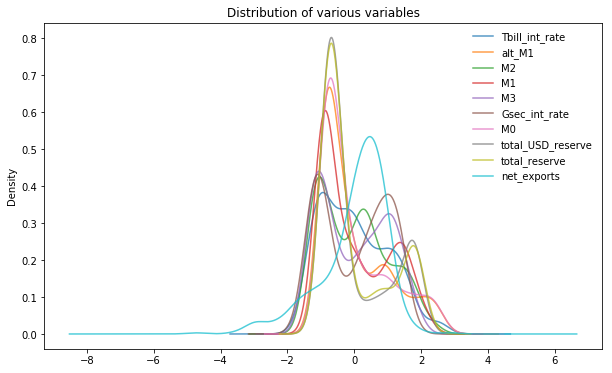

In [50]:
plt.rcParams['figure.figsize'] = (10,6)
for i in variables_std.columns:
    variables_std[i].plot.kde(alpha=0.75);
plt.legend(labels=variables_std.columns, frameon=False, loc='best')
plt.title('Distribution of various variables')
plt.show()

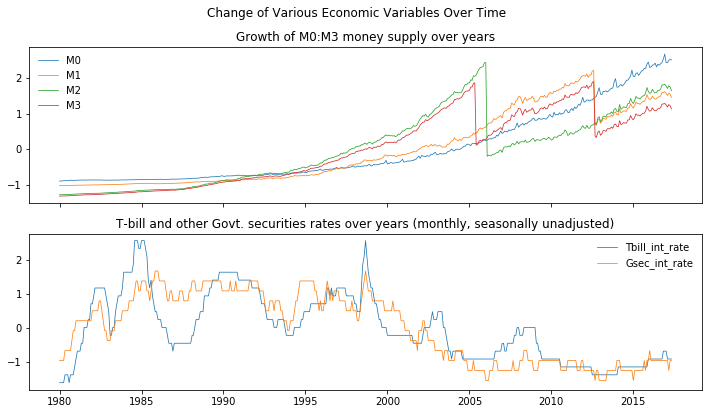

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True);
fig.set_size_inches(10,6)
ax1.plot(variables_std[['M0', 'M1', 'M2', 'M3']], linewidth=0.75)
ax1.legend(labels=['M0', 'M1', 'M2', 'M3'], frameon=False, loc='best')
ax1.set_title('Growth of M0:M3 money supply over years')
ax2.plot(variables_std[['Tbill_int_rate', 'Gsec_int_rate']], linewidth=0.75);
ax2.legend(labels=['Tbill_int_rate', 'Gsec_int_rate'],loc='best', frameon=False)
ax2.set_title('T-bill and other Govt. securities rates over years (monthly, seasonally unadjusted)')
plt.suptitle('Change of Various Economic Variables Over Time')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Explain what PCA is
<font size=1.8>Please fill in this section with PCA and the purpose it serves in our objective. (I will try to share a write-up in due course)</font>

In [52]:
from sklearn.decomposition import PCA

In [54]:
components = PCA()
scaled_variables = components.fit_transform(variables_std.T)

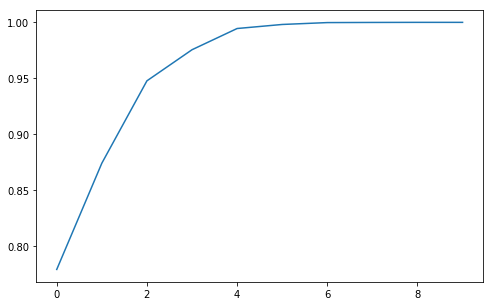

In [63]:
plt.rcParams['figure.figsize'] = (8,5)
pd.Series(data=components.explained_variance_ratio_, name='components').cumsum().plot.line();

2 components explain ~95% of variation; therefore we shall redecompose to just 2 variables

In [64]:
components_2 = PCA(n_components=2)
scaled_variables_2 = components_2.fit_transform(variables_std.T)
p_components = pd.DataFrame(data=scaled_variables_2, columns=['comp_1', 'comp_2'], index=variables_std.columns.tolist())

print(f"{components_2.explained_variance_ratio_}")
print('='*80)
p_components

[0.77942939 0.09484715]


,comp_1,comp_2
Tbill_int_rate,25.371830,-9.496550
alt_M1,-11.274542,0.549604
M2,-8.357176,-3.271979
M1,-11.452332,-0.632289
M3,-9.890369,-2.693116
Gsec_int_rate,28.030319,-2.669208
M0,-11.104448,0.936719
total_USD_reserve,-11.262526,1.435428
total_reserve,-11.295232,1.508676
net_exports,21.234476,14.332715


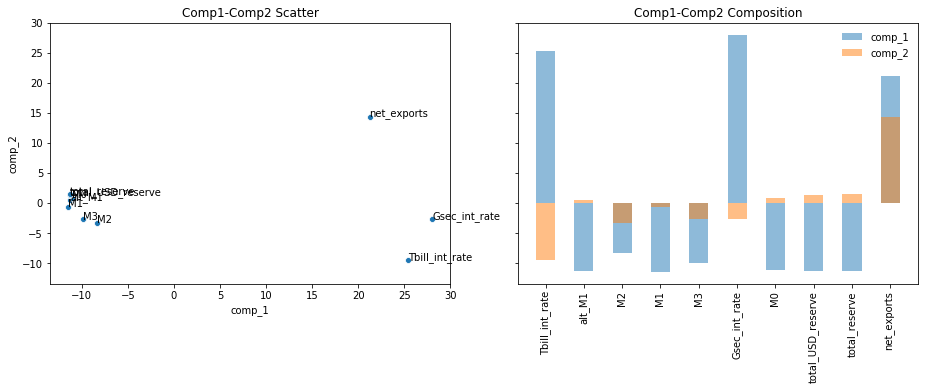

In [74]:
plt.rcParams['figure.figsize'] = (13,6)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True);
sns.scatterplot(x=p_components.comp_1, y=p_components.comp_2, ax=ax1);
ax1.set_title('Comp1-Comp2 Scatter')
# ax1.legend(title=None, frameon=False, loc='best')
for sample in p_components.index:
    ax1.annotate(sample, (p_components.comp_1.loc[sample], p_components.comp_2.loc[sample]))
ax2.bar(x=p_components.index, height=p_components.comp_1, width=0.5, alpha=0.5);
ax2.bar(x=p_components.index, height=p_components.comp_2, width=0.5, alpha=0.5);
ax2.legend(labels=p_components.columns, loc='best', frameon=False, title=None)
ax2.set_title('Comp1-Comp2 Composition')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Comments on the graph:
In machine learning parlance;
1. Govt. security interest rates and T-bill (sovreign debt) explain greatest variability in data.
2. These 2 highest features is next followed by Net-exports, explaining significant bit in variability.

<font size=1.7>
1. Note 01: the quality of this analysis is directly dependent to the quality of the data. Good, unadjusted and granular dataset is difficult to come by. We found one on St. Louis FRED database.<br>
2. Note 02: this is a 'quick-n-dirty' analysis. The variables in the data do not depict gaussian distribution; neither is the time-series stationary. Hence the conclusion of the analysis should be taken with 'grain of salt'.
</font>

In [75]:
from sklearn.linear_model import LinearRegression